# Immo proyect

### Introduction

### 0. Imports

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [101]:
df_raw = pd.read_csv('data/all_data_frame.csv', low_memory=False)

In [102]:
df_raw.shape

(18479, 127)

### 0. Clean Duplicated Data

In [103]:
df_raw.duplicated(subset='url').sum()

1106

In [104]:
df_raw = df_raw.drop_duplicates()

In [105]:
df_raw.shape

(17373, 127)

### Formating the data in the DataFrame

In [106]:
def keep_digits(column, type_of_digit=float):
        df_raw[column] = df_raw[column].str.extract('(\d+)').astype(type_of_digit).fillna(0)

In [107]:
df_raw[column] = df_raw[column].str.extract('(\d+)').astype(type_of_digit=float).fillna(0)

AttributeError: Can only use .str accessor with string values!

### Detecting **null values** in the data

In [90]:
total_elements = df_raw.shape[0]
total_elements

17373

In [98]:
for column in df_raw:
    print(f'{column} : {df_raw[column].isnull().sum()} , missing values: {round((df_raw[column].isnull().sum()/total_elements)*100,2)}%')

Available as of : 5920 , missing values: 34.08%
Available date : 14712 , missing values: 84.68%
Construction year : 5760 , missing values: 33.15%
Building condition : 3129 , missing values: 18.01%
Street frontage width : 13074 , missing values: 75.25%
Number of frontages : 4299 , missing values: 24.75%
Surroundings type : 10948 , missing values: 63.02%
Virtual visit : 14642 , missing values: 84.28%
Living area : 1311 , missing values: 7.55%
Living room surface : 8434 , missing values: 48.55%
Dining room : 13928 , missing values: 80.17%
Kitchen type : 4424 , missing values: 25.46%
Kitchen surface : 9865 , missing values: 56.78%
Bedrooms : 373 , missing values: 2.15%
Bedroom 1 surface : 7828 , missing values: 45.06%
Bedroom 2 surface : 8770 , missing values: 50.48%
Bathrooms : 2301 , missing values: 13.24%
Shower rooms : 12560 , missing values: 72.3%
Toilets : 2985 , missing values: 17.18%
Office surface : 15627 , missing values: 89.95%
Office : 10675 , missing values: 61.45%
Basement : 

### Expected input from the user
```json
{
  "data": {
    "area": int,
    "property-type": "APARTMENT" | "HOUSE" | "OTHERS",
    "rooms-number": int,
    "zip-code": int,
    "land-area": Optional[int],
    "garden": Optional[bool],
    "garden-area": Optional[int],
    "equipped-kitchen": Optional[bool],
    "full-address": Optional[str],
    "swimming-pool": Optional[bool],
    "furnished": Optional[bool],
    "open-fire": Optional[bool],
    "terrace": Optional[bool],
    "terrace-area": Optional[int],
    "facades-number": Optional[int],
    "building-state": Optional[
      "NEW" | "GOOD" | "TO RENOVATE" | "JUST RENOVATED" | "TO REBUILD"
    ]
  }
}


### 1. DataFrame

In [76]:
df = pd.read_csv('data/clean_data.csv')

#### Understandig the Data

In [77]:
df.shape

(16771, 21)

In [78]:
df_list = df.columns.tolist()[2:]
df_list

['type_of_property',
 'subtype_of_property',
 'Price',
 'locality',
 'zip_code',
 'Construction year',
 'Building condition',
 'Number of frontages',
 'Living area',
 'Kitchen type',
 'Bedrooms',
 'Furnished',
 'Surface of the plot',
 'Garden surface',
 'Terrace surface',
 'Swimming pool',
 'type_of_sale',
 'Terrace',
 'Garden']

## 2. Attribues understanding

In [5]:
for index,column in enumerate(df_list):
    print(column)
    print(df[df_list[index]].value_counts().head(10))
    print('\n')

type_of_property
house        7559
apartment    7017
other        2195
Name: type_of_property, dtype: int64


subtype_of_property
house                   6278
apartment               5894
villa                   1051
duplex                   480
penthouse                471
apartment-block          402
ground-floor             390
mixed-use-building       333
flat-studio              280
exceptional-property     224
Name: subtype_of_property, dtype: int64


Price
299000.0    277
249000.0    240
295000.0    227
395000.0    226
199000.0    222
275000.0    202
495000.0    179
399000.0    177
225000.0    176
349000.0    176
Name: Price, dtype: int64


locality
uccle           495
gent            412
ixelles         380
bruxelles       366
liege           308
antwerp         304
knokke-heist    276
oostende        251
blankenberge    194
schaerbeek      191
Name: locality, dtype: int64


zip_code
1180    501
8300    457
1000    434
1050    398
9000    377
8400    255
4000    205
1030    198

### Exploratory Data Analisys (EDA)

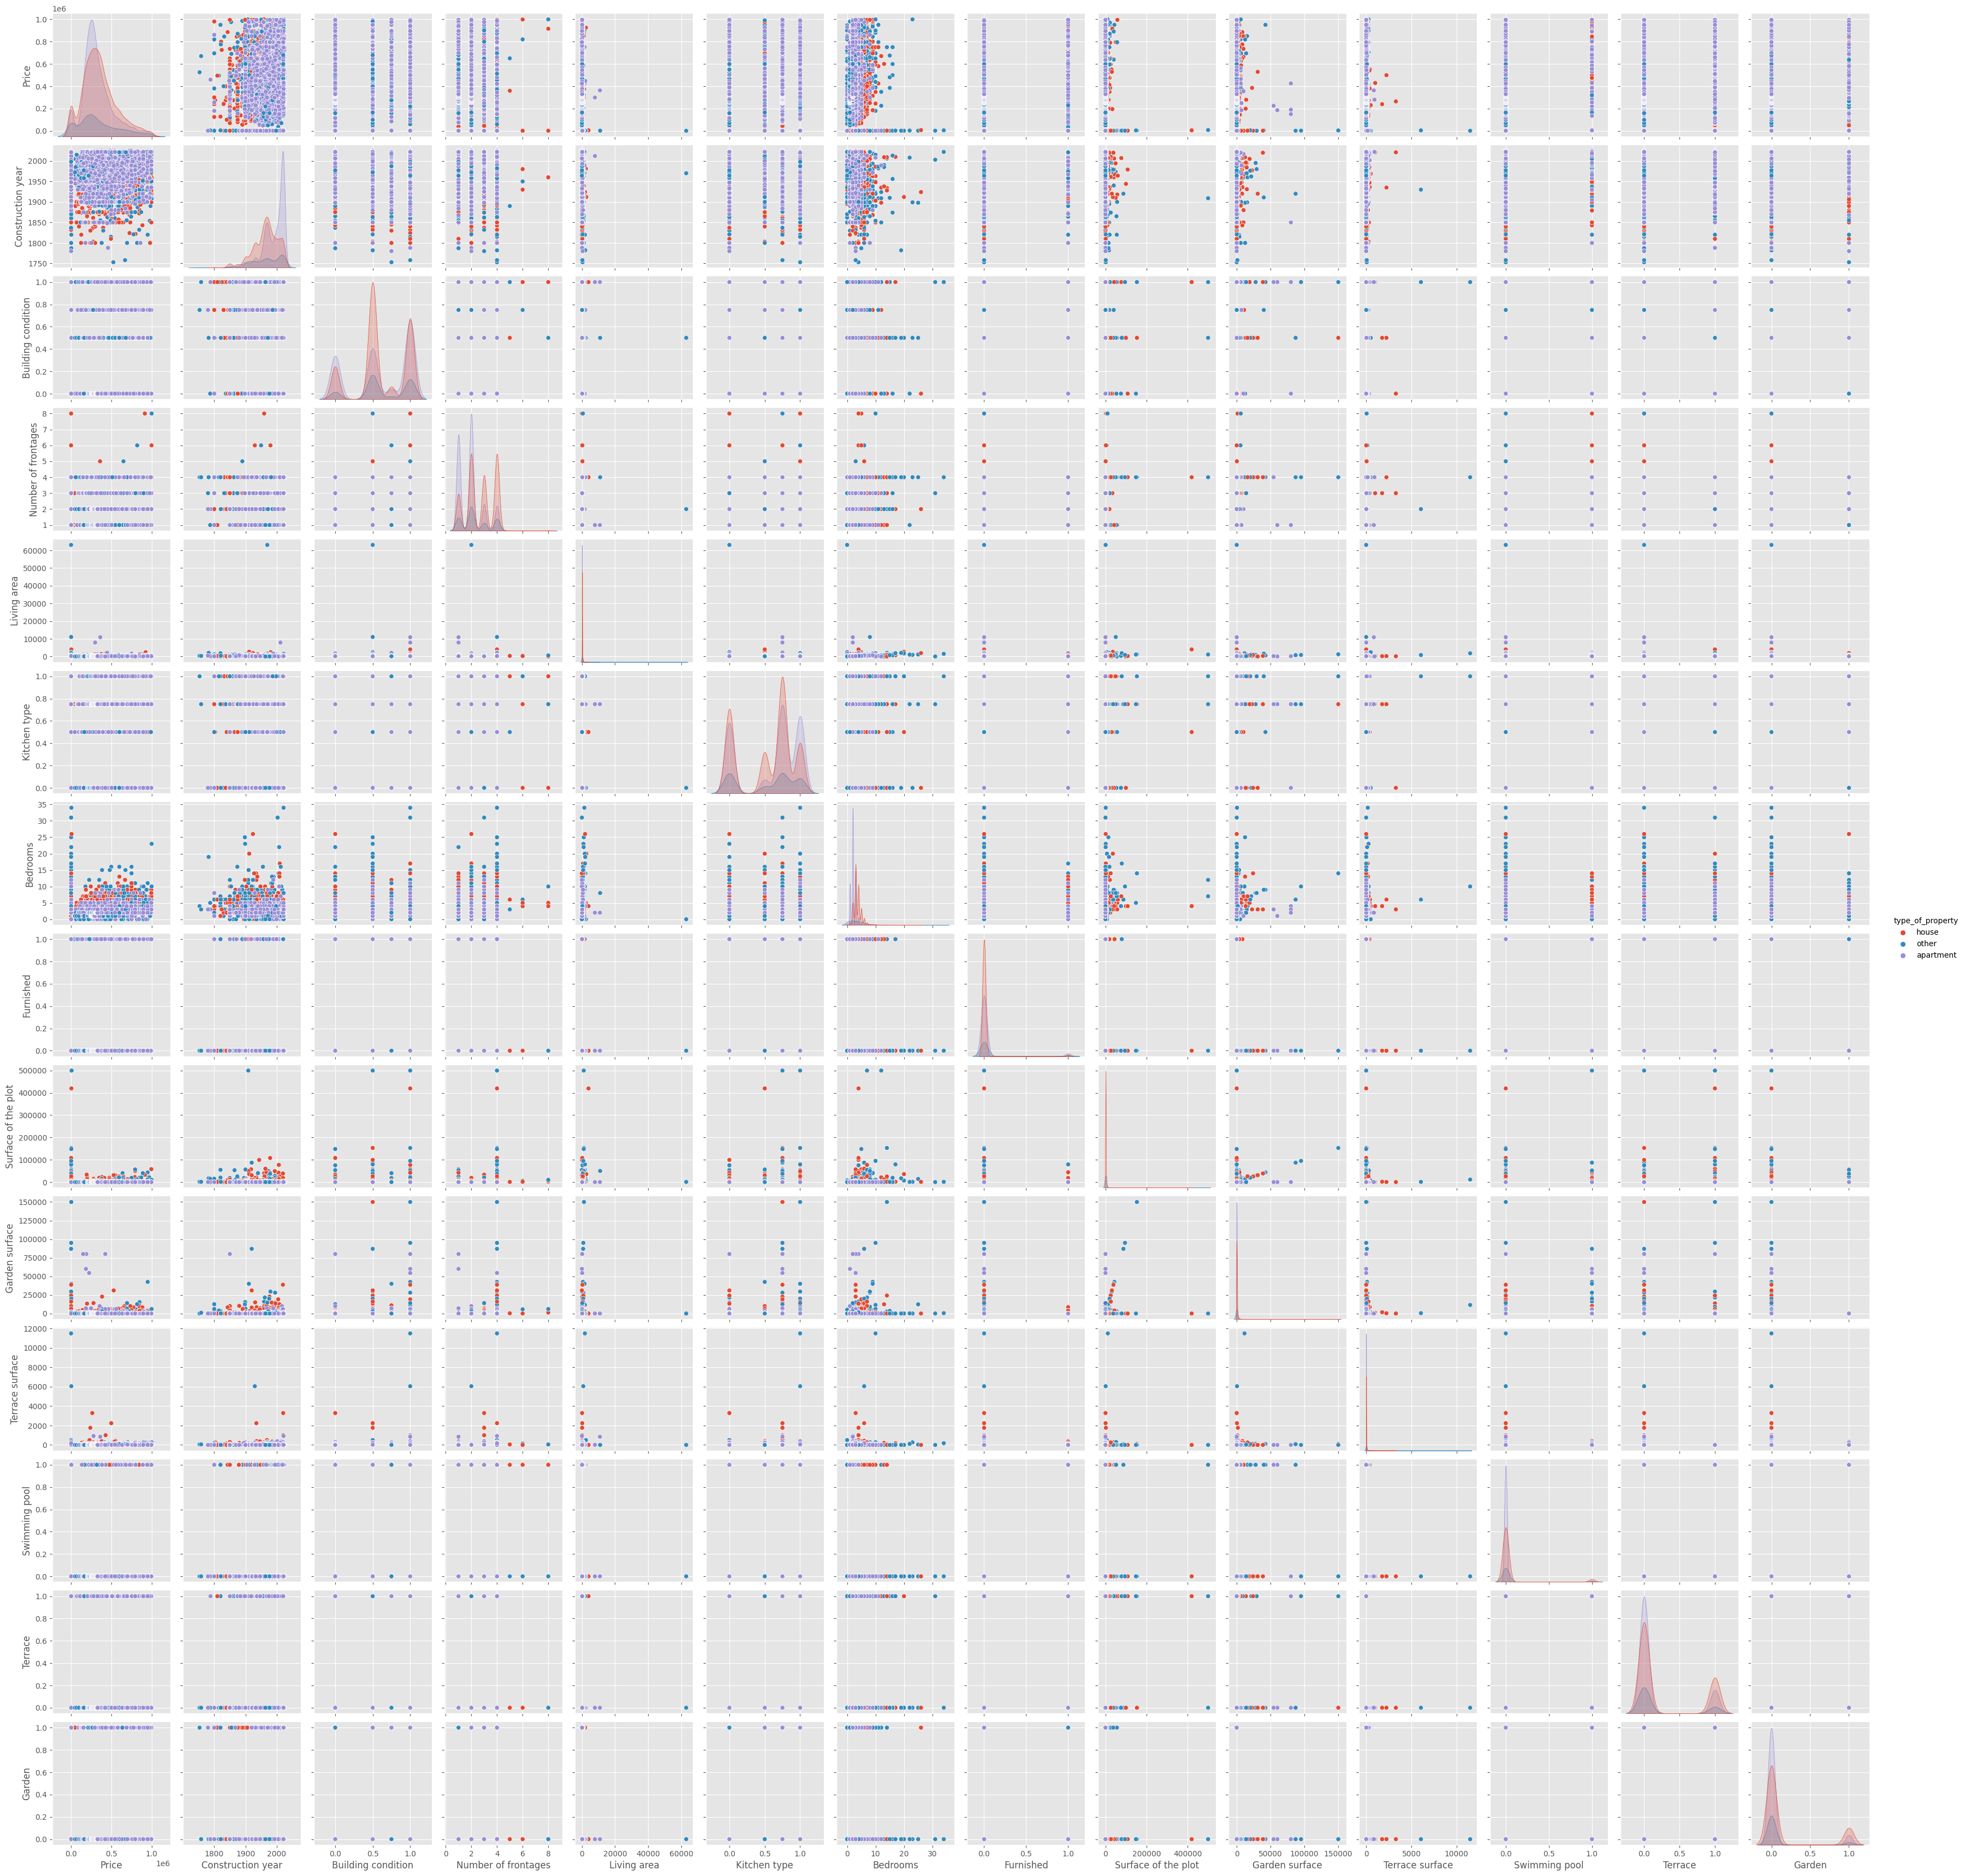

In [6]:
sns.pairplot(df,
             vars = [
                 #'type_of_property',  #not working
                 #'subtype_of_property',  #not working
                 'Price',
                 #'locality',  #not working
                 #'zip_code',  #not working
                 'Construction year',
                 'Building condition',
                 'Number of frontages',
                 'Living area',
                 'Kitchen type',
                 'Bedrooms',
                 'Furnished',
                 'Surface of the plot',
                 'Garden surface',
                 'Terrace surface',
                 'Swimming pool',
                 #'type_of_sale',  #not working
                 'Terrace',
                 'Garden'
             ],
             hue = 'type_of_property')
plt.show()

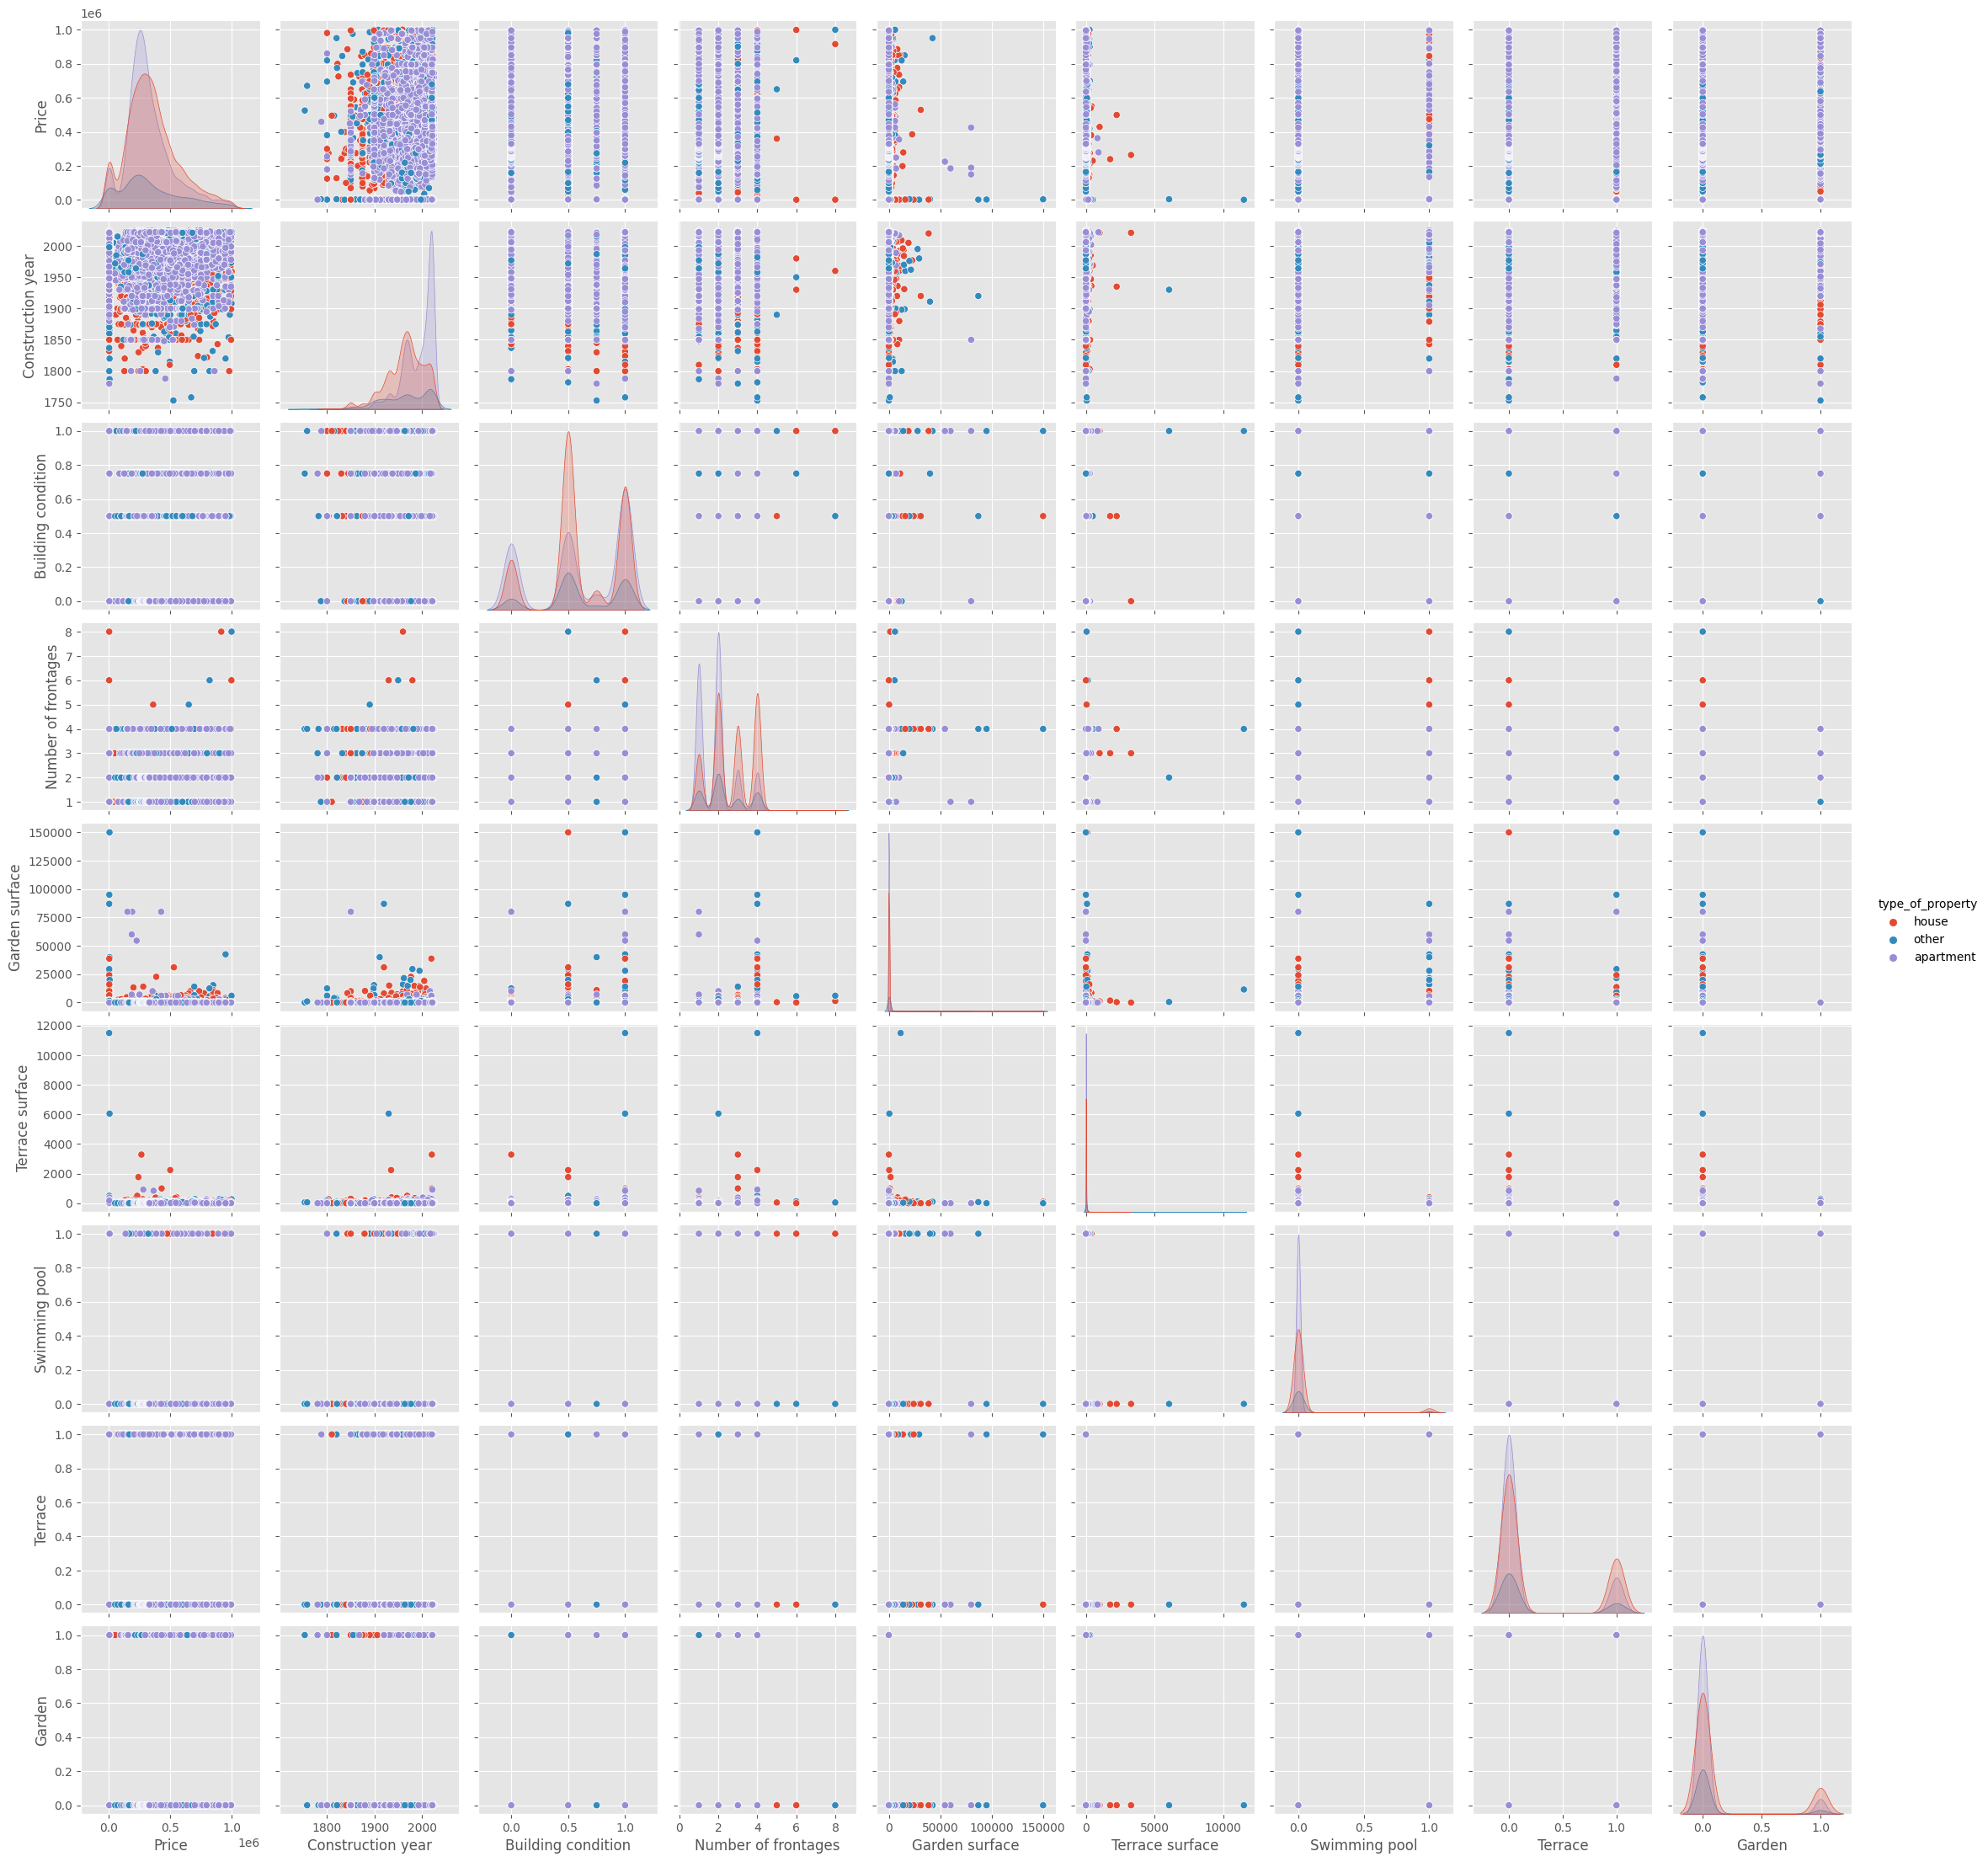

In [7]:
sns.pairplot(df,
             vars = [
                 #'type_of_property',  #not working
                 #'subtype_of_property',  #not working
                 'Price',
                 #'locality',  #not working
                 #'zip_code',  #not working
                 'Construction year',
                 'Building condition',
                 'Number of frontages',
                 #'Living area',
                 #'Kitchen type',
                 #'Bedrooms',
                 #'Furnished',
                 #'Surface of the plot',
                 'Garden surface',
                 'Terrace surface',
                 'Swimming pool',
                 #'type_of_sale',  #not working
                 'Terrace',
                 'Garden'
             ],
             hue = 'type_of_property')
plt.show()

add a colum to the Df for the region Wllonie, Flandres or Brussels 

In [8]:
df['Terrace'].value_counts()

0.0    13033
1.0     3738
Name: Terrace, dtype: int64

In [30]:
df['Price'].describe()

count     16771.000000
mean     339566.242919
std      208890.617336
min        1000.000000
25%      205000.000000
50%      299000.000000
75%      445000.000000
max      999999.000000
Name: Price, dtype: float64

In [ ]:
{
  "data": {
    "area": int,
    "property-type": "APARTMENT" | "HOUSE" | "OTHERS",
    "rooms-number": int,
    "zip-code": int,
    "land-area": Optional[int],
    "garden": Optional[bool],
    "garden-area": Optional[int],
    "equipped-kitchen": Optional[bool],
    "full-address": Optional[str],
    "swimming-pool": Optional[bool],
    "furnished": Optional[bool],
    "open-fire": Optional[bool],
    "terrace": Optional[bool],
    "terrace-area": Optional[int],
    "facades-number": Optional[int],
    "building-state": Optional[
      "NEW" | "GOOD" | "TO RENOVATE" | "JUST RENOVATED" | "TO REBUILD"
    ]
  }
}

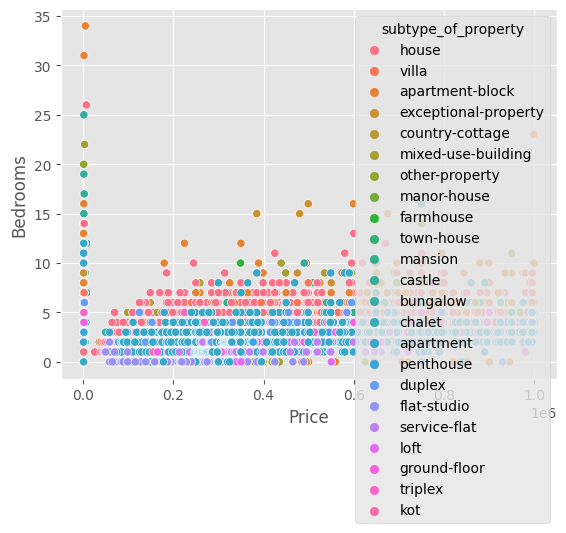

In [10]:
ax = sns.scatterplot(x='Price',
                     y='Bedrooms',
                     hue='subtype_of_property',
                     data=df)
plt.show()

Text(0.5, 0, 'Price (EU)')

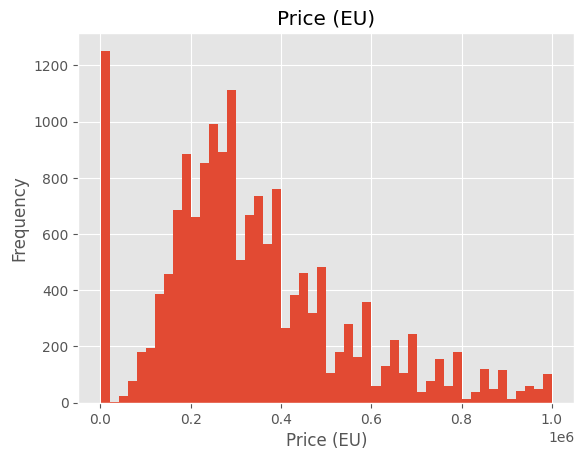

In [19]:
ax = df['Price'].plot(kind='hist',
                      title='Price (EU)',
                      #hue='type_of_property',
                      bins=50)
ax.set_xlabel('Price (EU)')

In [16]:
df['Price'].mean()

339566.242919325

# Questions

outlayzrs, items that dont belong to the 66% of the data, they are not representative, exceptional data
transform data into a normal distribution ?
look at outlayers, and understand them
python discord for every point, cut off
identify outlayer, maximum price or something?, do we need to flag the data?

raw_data, data exploration

#### Description of the **Raw Data**

#### Plot the **outliers**

#### Which variables would you **delete and why?**

#### Represent the **number of properties according to their surface using a histogram**

#### In your opinion, which **5 variables are the most** important and **why?**

#### What are the **most expensive municipalities in Belgium**? (**Average price, median price, price per square meter**)

#### What are the **most expensive municipalities in Wallonia**? (Average price, median price, price per square meter)

#### What are the **most expensive municipalities in Flanders**? (Average price, median price, price per square meter)

#### What are the less **expensive municipalities in Belgium**? (Average price, median price, price per square meter)

#### What are the less **expensive municipalities in Wallonia**? (Average price, median price, price per square meter)

#### What are the less **expensive municipalities in Flanders**? (Average price, median price, price per square meter)